- Environment name: opioid-eda

- Yearly deaths for each province, shown over a map
- DONE Ratio of deaths to population (NO CORRELATION) and deaths to population density (NO CORRELATION)
- Which provinces have the highest ratios of deaths/overdoses? Federal as well.
- Show the quarterly deaths by age nationally and provincially

# Data

## Download

In [1]:
# !pip install kaggle
# !kaggle datasets download -d craigchilvers/opioids-in-canada
# !unzip opioids-in-canada.zip

In [2]:
# load the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Examine Canadian Population and GDP Statistics Data

In [3]:
df_can_stats = pd.read_csv('Canada population and GDP by province.csv')
df_can_stats.head()

,Province name,Population (2021 Census),Land area (km^2),Population per km^2,"GDP (million CAD, 2019)","GDP per capita (CAD, 2019)","Market income per capita (CAD, 2019)"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ontario,"14,223,942","908,699.33",15.653079,"891,811","54,149","36,298"
2,Quebec,"8,501,833","1,356,625.27",6.266899,"460,357","54,149","32,351"
3,British Columbia,"5,000,879","922,503.01",5.420989,"309,059","60,707","36,723"
4,Alberta,"4,262,635","640,330.46",6.656930,"352,884","80,905","40,094"


In [4]:
# check for missing values
df_can_stats.isnull().sum()

Province name                           1
Population (2021 Census)                1
Land area (km^2)                        1
Population per km^2                     1
GDP (million CAD, 2019)                 1
GDP per capita (CAD, 2019)              1
Market income per capita (CAD, 2019)    1
dtype: int64

In [5]:
# check rows with missing values
missing_values = df_can_stats.isnull().any(axis=1)
rows_with_missing_values = df_can_stats[missing_values]
print(rows_with_missing_values)

  Province name Population (2021 Census) Land area (km^2)   
0           NaN                      NaN              NaN  \

   Population per km^2 GDP (million CAD, 2019) GDP per capita (CAD, 2019)   
0                  NaN                     NaN                        NaN  \

  Market income per capita (CAD, 2019)  
0                                  NaN  


In [6]:
# drop rows with missing values
df = df_can_stats.dropna()
df.isnull().sum()

Province name                           0
Population (2021 Census)                0
Land area (km^2)                        0
Population per km^2                     0
GDP (million CAD, 2019)                 0
GDP per capita (CAD, 2019)              0
Market income per capita (CAD, 2019)    0
dtype: int64

In [7]:
df_can_stats = df_can_stats.drop(0)
df_can_stats.head()

,Province name,Population (2021 Census),Land area (km^2),Population per km^2,"GDP (million CAD, 2019)","GDP per capita (CAD, 2019)","Market income per capita (CAD, 2019)"
1,Ontario,"14,223,942","908,699.33",15.653079,"891,811","54,149","36,298"
2,Quebec,"8,501,833","1,356,625.27",6.266899,"460,357","54,149","32,351"
3,British Columbia,"5,000,879","922,503.01",5.420989,"309,059","60,707","36,723"
4,Alberta,"4,262,635","640,330.46",6.656930,"352,884","80,905","40,094"
5,Manitoba,"1,342,153","552,370.99",2.429804,"73,814","53,897","30,132"


In [8]:
# check for duplicates
df_can_stats.duplicated().sum()

0

In [9]:
# check distribution of numeric columns
df_can_stats.describe()

,Population per km^2
count,13.000000
mean,7.399083
std,8.405390
min,0.019629
25%,1.377950
50%,5.420989
75%,10.864588
max,27.142136


In [10]:
# check distribution of categorical columns
df_can_stats.describe(include='O')

,Province name,Population (2021 Census),Land area (km^2),"GDP (million CAD, 2019)","GDP per capita (CAD, 2019)","Market income per capita (CAD, 2019)"
count,13,13,13,13,13,13
unique,13,13,13,13,12,13
top,Ontario,"14,223,942","908,699.33","891,811","54,149","36,298"
freq,1,1,1,1,2,1


In [11]:
# check distribution of categorical columns using value_counts()
print(len(df_can_stats['Province name'].value_counts()))
# 13 matches the 10 Canadian provinces and 3 territories

13


In [12]:
# the dataset is short enough to check all values
df_can_stats

,Province name,Population (2021 Census),Land area (km^2),Population per km^2,"GDP (million CAD, 2019)","GDP per capita (CAD, 2019)","Market income per capita (CAD, 2019)"
1,Ontario,"14,223,942","908,699.33",15.653079,"891,811","54,149","36,298"
2,Quebec,"8,501,833","1,356,625.27",6.266899,"460,357","54,149","32,351"
3,British Columbia,"5,000,879","922,503.01",5.420989,"309,059","60,707","36,723"
4,Alberta,"4,262,635","640,330.46",6.656930,"352,884","80,905","40,094"
5,Manitoba,"1,342,153","552,370.99",2.429804,"73,814","53,897","30,132"
6,Saskatchewan,"1,132,505","588,243.54",1.925232,"82,917","70,730","32,516"
7,Nova Scotia,"969,383","52,942.27",18.310190,"46,586","47,837","30,224"
8,New Brunswick,"775,610","71,388.81",10.864588,"38,236","49,218","28,649"
9,Newfoundland and Labrador,"510,550","370,514.08",1.377950,"35,349","71,527","30,977"
10,Prince Edward Island,"154,331","5,686.03",27.142136,"7,523","48,039","28,414"


# Examine Opioid and Stimulent Substance Harm Data

In [13]:
overdose_data = pd.read_csv('Canada opioid and stimulant Subtance Harms Data June 2022.csv')
overdose_data.head()

,Substance,Source,Specific_Measure,Type_Event,Region,PRUID,Time_Period,Year_Quarter,Aggregator,Disaggregator,Unit,Value
0,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2016,NaN,NaN,Crude rate,7.8
1,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2016,NaN,NaN,Number,2829
2,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2016,NaN,NaN,Age-adjusted rate,7.8
3,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2017,NaN,NaN,Crude rate,10.7
4,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2017,NaN,NaN,Number,3921


In [14]:
overdose_data.shape

(12159, 12)

In [15]:
overdose_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12159 entries, 0 to 12158
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Substance         12159 non-null  object
 1   Source            12159 non-null  object
 2   Specific_Measure  12159 non-null  object
 3   Type_Event        12159 non-null  object
 4   Region            12159 non-null  object
 5   PRUID             12159 non-null  int64 
 6   Time_Period       12159 non-null  object
 7   Year_Quarter      12159 non-null  object
 8   Aggregator        8123 non-null   object
 9   Disaggregator     8123 non-null   object
 10  Unit              12159 non-null  object
 11  Value             11624 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.1+ MB


In [16]:
overdose_data.sample(5)

,Substance,Source,Specific_Measure,Type_Event,Region,PRUID,Time_Period,Year_Quarter,Aggregator,Disaggregator,Unit,Value
2095,Opioids,Deaths,Type of opioids,Accidental apparent opioid toxicity deaths,Canada,1,By year,2018,2018,Fentanyl analogues,Percent,10
8430,Stimulants,Deaths,Overall numbers,Total apparent stimulant toxicity deaths,Ontario,35,By quarter,2021 Q3,NaN,NaN,Number,503
10980,Stimulants,Hospitalizations,Overall numbers,Accidental stimulant-related poisoning hospita...,New Brunswick,13,By quarter,2019 Q4,NaN,NaN,Number,Suppr.
12069,Stimulants,Hospitalizations,Age group by sex,Accidental stimulant-related poisoning hospita...,Canada,1,By year,2017,40 to 49 years,Female,Number,53
5638,Opioids,Hospitalizations,Overall numbers,Accidental opioid-related poisoning hospitaliz...,Manitoba,46,By quarter,2021 Q4,NaN,NaN,Number,22


# Clean Data

In [17]:
# check for missing values
overdose_data.isnull().sum()


Substance              0
Source                 0
Specific_Measure       0
Type_Event             0
Region                 0
PRUID                  0
Time_Period            0
Year_Quarter           0
Aggregator          4036
Disaggregator       4036
Unit                   0
Value                535
dtype: int64

In [18]:
# check rows with missing values
missing_values = overdose_data.isnull().any(axis=1)
rows_with_missing_values = overdose_data[missing_values]
print(rows_with_missing_values)

        Substance            Source                          Specific_Measure   
0         Opioids            Deaths                           Overall numbers  \
1         Opioids            Deaths                           Overall numbers   
2         Opioids            Deaths                           Overall numbers   
3         Opioids            Deaths                           Overall numbers   
4         Opioids            Deaths                           Overall numbers   
...           ...               ...                                       ...   
11875  Stimulants  Hospitalizations  Involving other non-stimulant substances   
11895  Stimulants  Hospitalizations  Involving other non-stimulant substances   
11899  Stimulants  Hospitalizations  Involving other non-stimulant substances   
11919  Stimulants  Hospitalizations  Involving other non-stimulant substances   
11923  Stimulants  Hospitalizations  Involving other non-stimulant substances   

                           

# Quarterly Opioid Deaths

## National

In [48]:
## Sort by opioid deather per quarter

# create boolean masks for required columns
is_opioid = overdose_data["Substance"] == "Opioids"
is_death = overdose_data["Source"] == "Deaths"
is_overdose = overdose_data["Type_Event"] == "Total apparent opioid toxicity deaths"
is_quarter = overdose_data["Time_Period"] == "By quarter"

is_year = overdose_data["Time_Period"] == "By year"
is_overall_numbers = overdose_data["Specific_Measure"] == "Overall numbers"

is_canada = overdose_data["Region"] == "Canada"
is_number = overdose_data["Unit"] == "Number"

deaths_by_quarter = overdose_data[is_opioid &
                                  is_death & 
                                  is_overdose &
                                  is_quarter]

deaths_by_year = overdose_data[is_opioid &
                               is_death &
                               is_overall_numbers & 
                               is_overdose &
                               is_year]

overdoses_by_quarter = overdose_data[is_opioid &
                               is_overall_numbers & 
                               is_quarter]

# print(deaths_by_quarter['Region'].unique())
# deaths_by_quarter
print(deaths_by_year['Type_Event'].unique())
overdoses_by_quarter

['Total apparent opioid toxicity deaths']


,Substance,Source,Specific_Measure,Type_Event,Region,PRUID,Time_Period,Year_Quarter,Aggregator,Disaggregator,Unit,Value
0,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2016,NaN,NaN,Crude rate,7.8
1,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2016,NaN,NaN,Number,2829
2,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2016,NaN,NaN,Age-adjusted rate,7.8
3,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2017,NaN,NaN,Crude rate,10.7
4,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2017,NaN,NaN,Number,3921
...,...,...,...,...,...,...,...,...,...,...,...,...
7147,Opioids,Emergency Medical Services (EMS),Overall numbers,EMS responses to suspected opioid-related over...,Yellowknife Northwest Territories,61,By year,2017,NaN,NaN,Number,Suppr.
7148,Opioids,Emergency Medical Services (EMS),Overall numbers,EMS responses to suspected opioid-related over...,Yellowknife Northwest Territories,61,By year,2018,NaN,NaN,Number,Suppr.
7149,Opioids,Emergency Medical Services (EMS),Overall numbers,EMS responses to suspected opioid-related over...,Yellowknife Northwest Territories,61,By year,2019,NaN,NaN,Number,Suppr.
7150,Opioids,Emergency Medical Services (EMS),Overall numbers,EMS responses to suspected opioid-related over...,Yellowknife Northwest Territories,61,By year,2020,NaN,NaN,Number,6


In [20]:
## BROKEN
# This is not merging correctly. It is only merging rows that match. Since canada is not in the population data, it is not merging.


# # merge the opioid deaths data with the population data
# deaths_by_quarter = deaths_by_quarter.merge(df_can_stats, left_on='Region', right_on='Province name')
# print(deaths_by_quarter['Region'].unique())

In [21]:
# change 'Year_Quarter' to datetime
dt = pd.to_datetime(deaths_by_quarter['Year_Quarter'].str.replace(' ', ''))
dt = dt + pd.offsets.QuarterEnd(0)
deaths_by_quarter['Year_Quarter'] = dt

/tmp/ipykernel_10219/832623751.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(deaths_by_quarter['Year_Quarter'].str.replace(' ', ''))
/tmp/ipykernel_10219/832623751.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths_by_quarter['Year_Quarter'] = dt


In [22]:
# provinces = all unique values in the 'Regions' column
provinces = deaths_by_quarter['Region'].unique()
is_province = deaths_by_quarter["Region"].isin(provinces)
can_deaths_by_quarter = deaths_by_quarter[is_canada &
                                          is_number]

# can_deaths_by_quarter['Region'].unique()
can_deaths_by_quarter

/tmp/ipykernel_10219/3182431884.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  can_deaths_by_quarter = deaths_by_quarter[is_canada &


,Substance,Source,Specific_Measure,Type_Event,Region,PRUID,Time_Period,Year_Quarter,Aggregator,Disaggregator,Unit,Value
18,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By quarter,2016-03-31,NaN,NaN,Number,668
19,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By quarter,2016-06-30,NaN,NaN,Number,637
20,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By quarter,2016-09-30,NaN,NaN,Number,654
21,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By quarter,2016-12-31,NaN,NaN,Number,860
22,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By quarter,2017-03-31,NaN,NaN,Number,920
23,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By quarter,2017-06-30,NaN,NaN,Number,1021
24,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By quarter,2017-09-30,NaN,NaN,Number,1054
25,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By quarter,2017-12-31,NaN,NaN,Number,921
26,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By quarter,2018-03-31,NaN,NaN,Number,1039
27,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By quarter,2018-06-30,NaN,NaN,Number,1021


In [23]:
# set 'Year_Quarter' as index
can_deaths_by_quarter.set_index('Year_Quarter', inplace=True)
# sort by index
can_deaths_by_quarter.sort_index(inplace=True)
can_deaths_by_quarter

,Substance,Source,Specific_Measure,Type_Event,Region,PRUID,Time_Period,Aggregator,Disaggregator,Unit,Value
Year_Quarter,,,,,,,,,,,
2016-03-31,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By quarter,NaN,NaN,Number,668
2016-06-30,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By quarter,NaN,NaN,Number,637
2016-09-30,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By quarter,NaN,NaN,Number,654
2016-12-31,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By quarter,NaN,NaN,Number,860
2017-03-31,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By quarter,NaN,NaN,Number,920
2017-06-30,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By quarter,NaN,NaN,Number,1021
2017-09-30,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By quarter,NaN,NaN,Number,1054
2017-12-31,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By quarter,NaN,NaN,Number,921
2018-03-31,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By quarter,NaN,NaN,Number,1039


In [24]:
# list unique values in Aggregator and Disaggregator columns
print(can_deaths_by_quarter['Aggregator'].unique())
print(can_deaths_by_quarter['Disaggregator'].unique())

[nan]
[nan]


In [25]:
# resolve 'object' type error
print(can_deaths_by_quarter['Value'].dtype)
can_deaths_by_quarter['Value'] = pd.to_numeric(can_deaths_by_quarter['Value'], errors='coerce')

object


/tmp/ipykernel_10219/4227198450.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  can_deaths_by_quarter['Value'] = pd.to_numeric(can_deaths_by_quarter['Value'], errors='coerce')


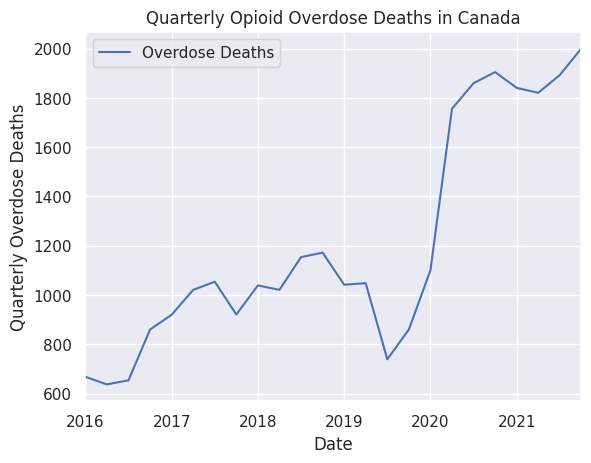

668
637
654
860
920
1021
1054
921
1039
1021
1154
1172
1042
1048
739
860
1100
1756
1860
1905
1841
1821
1893
2001


In [26]:
# create line plot using index for x-axis and 'Value' for y-axis
can_deaths_by_quarter.plot(kind='line', y='Value')
plt.xlabel('Date')
plt.ylabel('Quarterly Overdose Deaths')
plt.title('Quarterly Opioid Overdose Deaths in Canada')
plt.legend(labels=['Overdose Deaths'])
plt.show()

for value in can_deaths_by_quarter['Value']:
    print(value)

## Provincial

In [27]:
# create boolean masks for required columns
is_province = overdose_data["Region"] != "Canada"

prov_deaths_by_quarter = deaths_by_quarter[is_province &
                                      is_number]

# prov_deaths_by_quarter

/tmp/ipykernel_10219/3196471440.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prov_deaths_by_quarter = deaths_by_quarter[is_province &


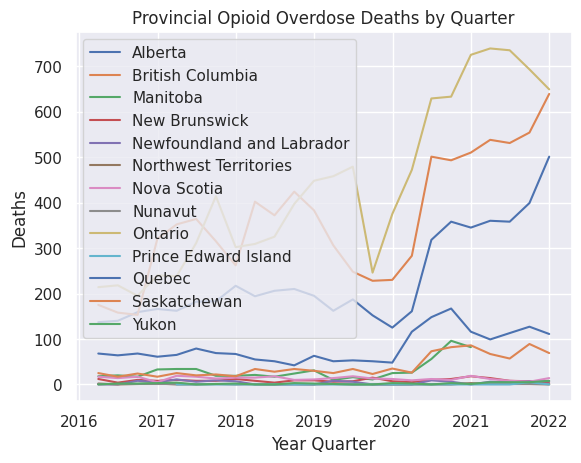

In [28]:

# Filter dataframe to include only selected provinces
df_filtered = prov_deaths_by_quarter[prov_deaths_by_quarter['Region'].isin(provinces)]

# Clean up the data
df_filtered['Value'] = df_filtered['Value'].replace('Suppr.', 0)
df_filtered['Value'] = pd.to_numeric(df_filtered['Value'])

# Group data by region
grouped = df_filtered.groupby('Region')

# Plot a line chart for each region
fig, ax = plt.subplots()
for province, data in grouped:
    ax.plot(data['Year_Quarter'], data['Value'], label=province)

# Set chart title and axis labels
ax.set_title('Provincial Opioid Overdose Deaths by Quarter')
ax.set_xlabel('Year Quarter')
ax.set_ylabel('Deaths')

# Add legend
ax.legend()

# Show the chart
plt.show()


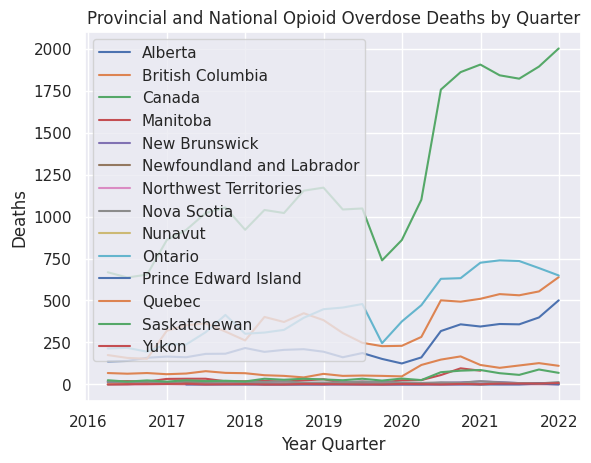

In [29]:
# provinces = all unique values in the 'Regions' column
regions = deaths_by_quarter['Region'].unique()

# Filter dataframe to include only selected provinces
df_filtered = deaths_by_quarter[deaths_by_quarter['Region'].isin(regions)]

# Clean up the data
df_filtered['Value'] = df_filtered['Value'].replace('Suppr.', 0)
df_filtered['Value'] = pd.to_numeric(df_filtered['Value'])

# Group data by region
grouped = df_filtered.groupby('Region')

# Plot a line chart for each region
fig, ax = plt.subplots()
for region, data in grouped:
    ax.plot(data['Year_Quarter'], data['Value'], label=region)

# Set chart title and axis labels
ax.set_title('Provincial and National Opioid Overdose Deaths by Quarter')
ax.set_xlabel('Year Quarter')
ax.set_ylabel('Deaths')

# Add legend
ax.legend()

# Show the chart
plt.show()


# Population

# Ratio of deaths to population (NO CORRELATION)

In [30]:
# # provinces = all unique values in the 'Regions' column
# provinces = prov_deaths_by_quarter['Region'].unique()

# # Filter dataframe to include only selected provinces
# df_filtered = prov_deaths_by_quarter[prov_deaths_by_quarter['Region'].isin(provinces)]

# # Clean up the data
# df_filtered['Value'] = df_filtered['Value'].replace('Suppr.', 0)
# df_filtered['Value'] = pd.to_numeric(df_filtered['Value'])
# df_filtered['Population (2021 Census)'] = pd.to_numeric(df_filtered['Population (2021 Census)'].str.replace(',', ''))

# # Group data by region
# grouped = df_filtered.groupby('Region')

# # Plot a line chart for each region
# fig, ax = plt.subplots()
# for province, data in grouped:
#     ax.plot(data['Year_Quarter'], data['Value']/data['Population (2021 Census)'], label=province)

# # Set chart title and axis labels
# ax.set_title('Provincial Opioid Overdose Deaths by Quarter')
# ax.set_xlabel('Year Quarter')
# ax.set_ylabel('Deaths')

# # Add legend
# ax.legend()

# # Show the chart
# plt.show()

KeyError: 'Population (2021 Census)'

# Ratio of deaths to population density (NO CORRELATION)

In [ ]:
# # provinces = all unique values in the 'Regions' column
# provinces = prov_deaths_by_quarter['Region'].unique()

# # Filter dataframe to include only selected provinces
# df_filtered = prov_deaths_by_quarter[prov_deaths_by_quarter['Region'].isin(provinces)]

# # Clean up the data
# df_filtered['Value'] = df_filtered['Value'].replace('Suppr.', 0)
# df_filtered['Value'] = pd.to_numeric(df_filtered['Value'])
# df_filtered['Population per km^2'] = pd.to_numeric(df_filtered['Population per km^2'])

# # Group data by region
# grouped = df_filtered.groupby('Region')

# # Plot a line chart for each region
# fig, ax = plt.subplots()
# for province, data in grouped:
#     ax.plot(data['Year_Quarter'], data['Value']/data['Population per km^2'], label=province)

# # Set chart title and axis labels
# ax.set_title('Provincial Opioid Overdose Deaths by Quarter')
# ax.set_xlabel('Year Quarter')
# ax.set_ylabel('Deaths')

# # Add legend
# ax.legend()

# # Show the chart
# plt.show()